In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
labels = ['Abnormal(Ulcer)','Normal(Healthy skin)']

In [4]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFUEffectiveNet Dataset','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size, image_size))
        except:
            break
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFUEffectiveNet Dataset','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 110/110 [00:01<00:00, 71.07it/s] 


In [5]:
X_train.shape

(3190, 224, 224, 3)

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=1010)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=1010)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
import keras
import keras.utils
from keras import utils as np_utils
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [10]:
from tensorflow.keras.layers import Input, Conv2D, \
     BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

input = Input(shape=(224, 224, 3))

x = Conv2D(filters=96, kernel_size=11,
           strides=4,
           activation='relu')(input)  # 1st convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = Conv2D(filters=256,
           kernel_size=5,
           padding='same',
           activation='relu')(x)  # 2nd convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 3rd convolutional layer

x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 4th convolutional layer

x = Conv2D(filters=256,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 5th convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=4096, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=2, activation='softmax')(x)

In [11]:
inputs = input
AlexNet =  keras.Model(inputs, x, name='AlexNet')
AlexNet.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("AlexNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
AlexNet.fit(X_train,y_train,validation_split=0.05, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 1.7323 - accuracy: 0.7807
Epoch 1: val_accuracy improved from -inf to 0.61111, saving model to AlexNet.h5
86/86 [==============================] - 17s 84ms/step - loss: 1.7323 - accuracy: 0.7807 - val_loss: 1.5371 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.3707 - accuracy: 0.8596
Epoch 2: val_accuracy did not improve from 0.61111
86/86 [==============================] - 4s 42ms/step - loss: 0.3707 - accuracy: 0.8596 - val_loss: 1.5376 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 3/20
85/86 [============================>.] - ETA: 0s - loss: 0.3370 - accuracy: 0.8728
Epoch 3: val_accuracy improved from 0.61111 to 0.67361, saving model to AlexNet.h5
86/86 [==============================] - 5s 64ms/step - loss: 0.3366 - accuracy: 0.8731 - val_loss: 0.6840 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.3033

In [12]:
from tensorflow.keras.layers import Input, Conv2D, \
     MaxPool2D, Flatten, Dense

input = Input(shape=(224, 224, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=2, activation='softmax')(x)

In [13]:
inputs = input
VGG16 =  keras.Model(inputs, x, name='VGG16')
VGG16.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("VGG16.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
VGG16.fit(X_train,y_train,validation_split=0.05, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 60.7204 - accuracy: 0.5772
Epoch 1: val_accuracy improved from -inf to 0.59722, saving model to VGG16.h5
86/86 [==============================] - 57s 579ms/step - loss: 60.7204 - accuracy: 0.5772 - val_loss: 0.6832 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5963
Epoch 2: val_accuracy did not improve from 0.59722
86/86 [==============================] - 37s 436ms/step - loss: 0.6774 - accuracy: 0.5963 - val_loss: 0.6742 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.5974
Epoch 3: val_accuracy did not improve from 0.59722

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
86/86 [==============================] - 37s 426ms/step - loss: 0.6750 - accuracy: 0.5974 - val_loss: 0.6744 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 4/20
86/86 [======

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, \
     Concatenate, AvgPool2D, Dropout, Flatten, Dense
      
def inception_block(x, filters):
    t1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    t2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    t2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', activation='relu')(t2)

    t3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    t3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', activation='relu')(t3)

    t4 = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    t4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(t4)

    output = Concatenate()([t1, t2, t3, t4])
    return output

input = Input(shape=(224, 224, 3))
x = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = Conv2D(filters=64, kernel_size=1, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
x = inception_block(x, filters=[128, 128, 256, 24, 64, 64])
x = inception_block(x, filters=[112, 144, 288, 32, 64, 64])
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = inception_block(x, filters=[384, 192, 384, 48, 128, 128])
x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dropout(rate=0.4)(x)

x = Flatten()(x)
x = Dense(units=2, activation='softmax')(x)

In [15]:
inputs = input
GoogLeNet =  keras.Model(inputs, x, name='googleNet')
GoogLeNet.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("GoogLeNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
GoogLeNet.fit(X_train,y_train,validation_split=0.05, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 1.0931 - accuracy: 0.6186
Epoch 1: val_accuracy improved from -inf to 0.72917, saving model to GoogLeNet.h5
86/86 [==============================] - 19s 151ms/step - loss: 1.0931 - accuracy: 0.6186 - val_loss: 0.6041 - val_accuracy: 0.7292 - lr: 0.0010
Epoch 2/20
85/86 [============================>.] - ETA: 0s - loss: 0.4709 - accuracy: 0.7971
Epoch 2: val_accuracy improved from 0.72917 to 0.90972, saving model to GoogLeNet.h5
86/86 [==============================] - 10s 118ms/step - loss: 0.4709 - accuracy: 0.7968 - val_loss: 0.3130 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 3/20
85/86 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8559
Epoch 3: val_accuracy did not improve from 0.90972
86/86 [==============================] - 10s 114ms/step - loss: 0.3511 - accuracy: 0.8563 - val_loss: 0.2334 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 4/20
85/86 [============================>.] - ETA: 0s - los

In [16]:
import tensorflow
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, \
     Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate
 
 
def bn_rl_conv(x, filters, kernel_size):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same')(x)
    return x
 
 
def dense_block(tensor, k, reps):
    for _ in range(reps):
        x = bn_rl_conv(tensor, filters=4*k, kernel_size=1)
        x = bn_rl_conv(x, filters=k, kernel_size=3)
        tensor = Concatenate()([tensor, x])
    return tensor
 
 
def transition_layer(x, theta):
    f = int(tensorflow.keras.backend.int_shape(x)[-1] * theta)
    x = bn_rl_conv(x, filters=f, kernel_size=1)
    x = AvgPool2D(pool_size=2, strides=2, padding='same')(x)
    return x 

k = 32
theta = 0.5
repetitions = 6, 12, 24, 16
 
input = Input(shape=(224, 224, 3))
 
x = Conv2D(2*k, 7, strides=2, padding='same')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)
 
for reps in repetitions:
    d = dense_block(x, k, reps)
    x = transition_layer(d, theta)
 
x = GlobalAvgPool2D()(d)
 
output = Dense(2, activation='softmax')(x)
 
from tensorflow.keras import Model 
DenseNet121 = Model(input, output,  name='DenseNet121')

In [17]:
DenseNet121.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("DenseNet121.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
DenseNet121.fit(X_train,y_train,validation_split=0.05, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.6365 - accuracy: 0.7939
Epoch 1: val_accuracy improved from -inf to 0.38194, saving model to DenseNet121.h5
86/86 [==============================] - 59s 466ms/step - loss: 0.6365 - accuracy: 0.7939 - val_loss: 13.0235 - val_accuracy: 0.3819 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.4693 - accuracy: 0.8298
Epoch 2: val_accuracy improved from 0.38194 to 0.59722, saving model to DenseNet121.h5
86/86 [==============================] - 33s 385ms/step - loss: 0.4693 - accuracy: 0.8298 - val_loss: 25.2044 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8493
Epoch 3: val_accuracy did not improve from 0.59722
86/86 [==============================] - 32s 367ms/step - loss: 0.3521 - accuracy: 0.8493 - val_loss: 4.6633 - val_accuracy: 0.5972 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - ETA: 0s

In [18]:
def inception_module(x, f1, f2, f3, f4):
		# 1x1 conv
		conv1 = keras.layers.Conv2D(f1, (1,1), strides=(1, 1), padding='same', activation='relu')(x)
		# 3x3 conv
		conv3 = keras.layers.Conv2D(f2, (3,3), strides=(1, 1), padding='same', activation='relu')(x)
		# 5x5 conv
		conv5 = keras.layers.Conv2D(f3, (5,5), strides=(1, 1), padding='same', activation='relu')(x)
		conv7 = keras.layers.Conv2D(f4, (7,7), strides=(1, 1), padding='same', activation='relu')(x)
		x = keras.layers.concatenate([conv1, conv3, conv5, conv7])
		return x

In [19]:
def conv2d_bn(x,filters,num_row,num_col,padding='same',strides=(1, 1)):
   
    x = keras.layers.Conv2D(filters, (num_row, num_col),strides=strides,padding=padding)(x)
    x = keras.layers.BatchNormalization(axis=3, scale=False)(x)
    x = keras.layers.Activation('relu')(x)
    return x

In [20]:
img_input = keras.Input(shape=(224, 224, 3))  
x = conv2d_bn(img_input, 64, 7, 7, strides=(2, 2), padding='same') # 149 x 149 x 32
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)   # 73  x 73 x 64

x = conv2d_bn(x, 64, 1, 1, padding='same')  # 147 x 147 x 32
x = conv2d_bn(x, 192, 3, 3, padding='same') # 147 x 147 x 64
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)   # 73  x 73 x 64

#inception_module(x, f1, f2, f3)
x = inception_module(x, 128, 128, 128, 128)
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)  # 35 x 35 x 512

x = inception_module(x, 192, 192, 192, 192)
x = inception_module(x, 256, 256, 256, 256)
x = inception_module(x, 256, 256, 256, 256)
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)  # 35 x 35 x 512

x = inception_module(x, 512, 512, 512, 512)
x = keras.layers.MaxPooling2D((7, 7), strides=(1, 1))(x)  # 35 x 35 x 192

#x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x) # shape=(None, 2048)
x = Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(2, activation='softmax', name='predictions')(x) #shape=(None, 1000) 

In [21]:
inputs = img_input
DFUV3 =  keras.Model(inputs, x, name='DFUEffectiveNetV3')
DFUV3.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("DFUV3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
DFUV3.fit(X_train,y_train,validation_split=0.05, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 7.0421 - accuracy: 0.7253
Epoch 1: val_accuracy improved from -inf to 0.84028, saving model to DFUV3.h5
86/86 [==============================] - 61s 567ms/step - loss: 7.0421 - accuracy: 0.7253 - val_loss: 0.5353 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.3642 - accuracy: 0.8603
Epoch 2: val_accuracy improved from 0.84028 to 0.90972, saving model to DFUV3.h5
86/86 [==============================] - 40s 461ms/step - loss: 0.3642 - accuracy: 0.8603 - val_loss: 0.3053 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.8911
Epoch 3: val_accuracy did not improve from 0.90972
86/86 [==============================] - 35s 411ms/step - loss: 0.2596 - accuracy: 0.8911 - val_loss: 0.3148 - val_accuracy: 0.8681 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.227

In [22]:
# predict probabilities
pred_prob1 = AlexNet.predict(X_test)   
pred_prob2 = VGG16.predict(X_test)
pred_prob3 = GoogLeNet.predict(X_test)
pred_prob4 = DenseNet121.predict(X_test)
pred_prob5 = DFUV3.predict(X_test)

10/10 [==============================] - 4s 416ms/step


In [23]:
y_test=np.argmax(y_test,axis=1)

In [24]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [25]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_AlexNet = roc_auc_score(y_test, pred_prob1[:,1])
auc_score_VGG16 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score_GoogLeNet = roc_auc_score(y_test, pred_prob3[:,1])
auc_score_DenseNet121 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score_DFUV3 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score_AlexNet, auc_score_VGG16, auc_score_GoogLeNet, auc_score_DenseNet121, auc_score_DFUV3)

0.9734904880066172 0.5 0.9864764267990074 0.9836641852770885 0.9828784119106699


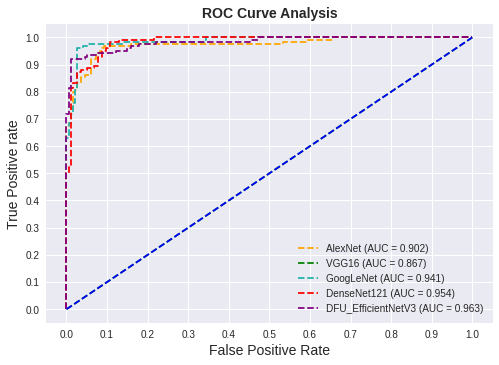

In [26]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AlexNet (AUC = 0.902)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='VGG16 (AUC = 0.867)')
plt.plot(fpr3, tpr3, linestyle='--',color='LightSeaGreen', label='GoogLeNet (AUC = 0.941)')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='DenseNet121 (AUC = 0.954)')
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label='DFU_EfficientNetV3 (AUC = 0.963)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve1',dpi=400)
plt.show();

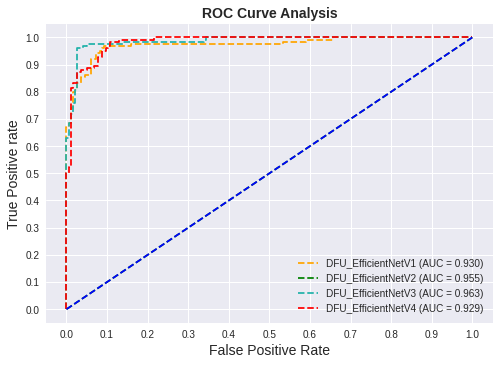

In [27]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DFU_EfficientNetV1 (AUC = 0.930)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DFU_EfficientNetV2 (AUC = 0.955)')
plt.plot(fpr3, tpr3, linestyle='--',color='LightSeaGreen', label='DFU_EfficientNetV3 (AUC = 0.963)')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='DFU_EfficientNetV4 (AUC = 0.929)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve2',dpi=400)
plt.show();